<h1>Assignment 2: Clustering</h1>
<h3>Sessa Empirical Estimator</h3>

<b>Author:</b><br>
Soroño, Alliah Mari O.
<hr>


$\textbf{General Instructions:}$

1. Read the Journals about the Sessa Empirical Estimator.
2. Convert the R codes into Python Codes (use jupyter notebook).
3. Using Simulated data (https://www.frontiersin.org/journals/pharmacology/articles/10.3389/fphar.2019.00383/full) or a real world datasets of your choice (You can obtain it in Kaggle or in https://archive.ics.uci.edu/), perform the Sessa Empircal Estimator and generate some insights.
4. The Sessa Empirical Estimator uses K-Means clustering (again recall the disadvantages of K-Means), try to substitute a different clustering algorithm, generate a new insight using the new clustering algorithm.
5. Compare your results between Sessa Empirical Estimator using K-Means, and Sessa Empirical Estimator using the clustering algorithm of your choice.
6. Deadline is this Sunday, Feb 23, 2022 at 11:59 pm
7. Do this with your thesis partner.
8. You can use any A.I. assistant.<br>

Additional Task: Create a callable function in each step. Check if these callable function has the same result (and insights) with your Jupyter Notebook.
<hr>

$\textbf{Imports}$

These are external libraries needed.

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

$\textbf{Data Preprocessing}$

This prepares raw data for analysis by cleaning, transforming, and organizing it. It ensures data quality by handling missing values, converting data types, standardizing numerical values, and encoding categories — all necessary for accurate and efficient model performance.

In [519]:
def load_and_inspect_data(file_path):
    try:
        med_events = pd.read_csv(file_path)
        print("CSV file loaded successfully!")

        if 'DATE' in med_events.columns:
            med_events['DATE'] = pd.to_datetime(med_events['DATE'], errors='coerce')

        print("\nBasic Information:")
        print(med_events.info())
        print("\nFirst Five Rows:")
        print(med_events.head())
        print("\nMissing Values:")
        print(med_events.isnull().sum())

    except FileNotFoundError:
        print(f"Error: File not found at {file_path}. Ensure the file exists.")
        return None
    return med_events

med_events = load_and_inspect_data('med_events.csv')


CSV file loaded successfully!

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   PATIENT_ID  1080 non-null   int64         
 1   DATE        1080 non-null   datetime64[ns]
 2   PERDAY      1080 non-null   int64         
 3   CATEGORY    1080 non-null   object        
 4   DURATION    1080 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 42.3+ KB
None

First Five Rows:
   PATIENT_ID       DATE  PERDAY CATEGORY  DURATION
0           1 2033-04-26       4     medA        50
1           1 2033-07-04       4     medB        30
2           1 2033-08-03       4     medB        30
3           1 2033-08-17       4     medB        30
4           1 2033-10-13       4     medB        30

Missing Values:
PATIENT_ID    0
DATE          0
PERDAY        0
CATEGORY      0
DURATION      0
dtype:

$\textbf{Data Cleaning and Transformation}$

This step ensures the data is consistent, complete, and ready for analysis.


In [592]:
def clean_and_transform_data(med_events):
    med_events.dropna(inplace=True)

    if med_events.select_dtypes(include='object').shape[1] > 0:
        med_events = pd.get_dummies(med_events)

    scaler = StandardScaler()
    med_events[med_events.select_dtypes(include=np.number).columns] = scaler.fit_transform(med_events.select_dtypes(include=np.number))

    print("\nCleaned and Transformed Data:")
    print(med_events.head())

    return med_events

med_events = clean_and_transform_data(med_events)



Cleaned and Transformed Data:
   PATIENT_ID       DATE   PERDAY  DURATION  CATEGORY_medA  CATEGORY_medB  \
0   -1.665272 2033-04-26  0.11084  0.118726           True          False   
1   -1.665272 2033-07-04  0.11084 -0.787453          False           True   
2   -1.665272 2033-08-03  0.11084 -0.787453          False           True   
3   -1.665272 2033-08-17  0.11084 -0.787453          False           True   
4   -1.665272 2033-10-13  0.11084 -0.787453          False           True   

       Year   Cluster  Cluster_DBSCAN  
0 -1.288471  0.072189       -1.033858  
1 -1.288471  0.072189       -0.998824  
2 -1.288471  0.072189       -0.998824  
3 -1.288471  0.072189       -0.998824  
4 -1.288471  0.072189       -0.998824  


$\textbf{Visualizing and Interpreting Clusters}$

This step helps us see the grouping of data points based on their assigned clusters and analyze patterns by checking the average values for each cluster.


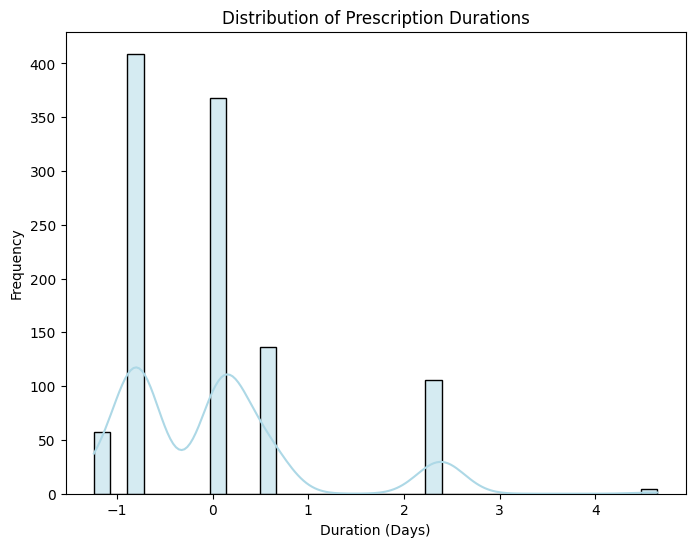

In [601]:
def plot_duration_distribution(med_events):
    plt.figure(figsize=(8, 6))
    sns.histplot(med_events['DURATION'], kde=True, color='lightblue')
    plt.title('Distribution of Prescription Durations')
    plt.xlabel('Duration (Days)')
    plt.ylabel('Frequency')
    plt.show()

plot_duration_distribution(med_events)


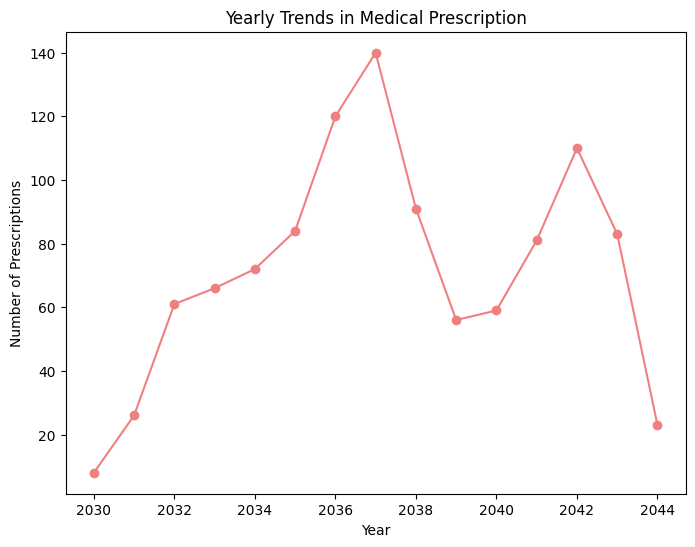

In [609]:
def plot_yearly_trends(med_events):
    if 'DATE' in med_events.columns:
        med_events['Year'] = med_events['DATE'].dt.year
        yearly_trend = med_events.groupby('Year').size()
        plt.figure(figsize=(8, 6))
        yearly_trend.plot(marker='o', linestyle='-', color='lightcoral')
        plt.title('Yearly Trends in Medical Prescription')
        plt.xlabel('Year')
        plt.ylabel('Number of Prescriptions')
        plt.show()

plot_yearly_trends(med_events)


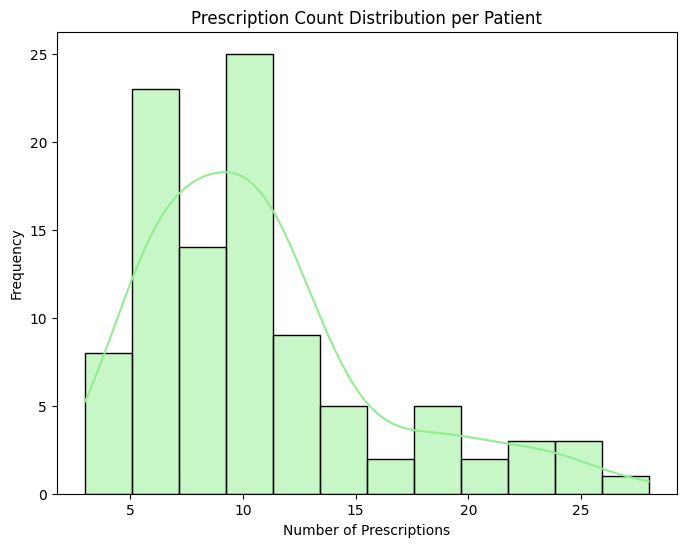

In [616]:
def plot_patient_prescriptions(med_events):
    plt.figure(figsize=(8, 6))
    sns.histplot(med_events['PATIENT_ID'].value_counts(), kde=True, color='lightgreen')
    plt.title('Prescription Count Distribution per Patient')
    plt.xlabel('Number of Prescriptions')
    plt.ylabel('Frequency')
    plt.show()

plot_patient_prescriptions(med_events)


C:\Users\GERRY\AppData\Local\Temp\ipykernel_19168\3179532956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=med_events['PERDAY'], palette='pastel')


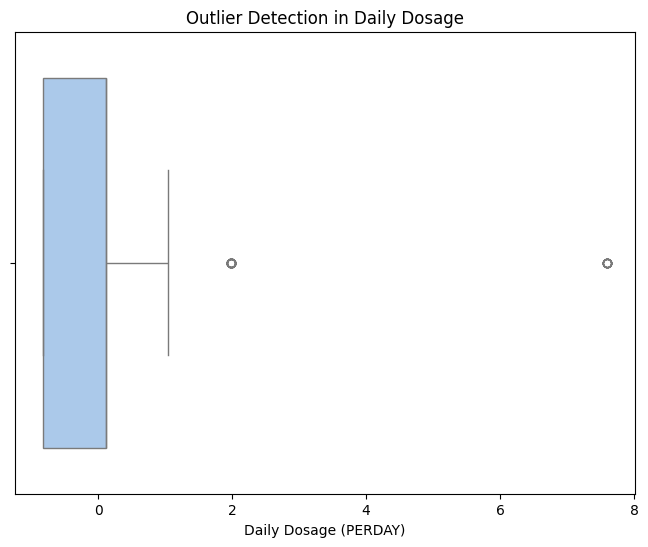

In [622]:
def plot_outlier_detection(med_events):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=med_events['PERDAY'], palette='pastel')
    plt.title('Outlier Detection in Daily Dosage')
    plt.xlabel('Daily Dosage (PERDAY)')
    plt.show()

plot_outlier_detection(med_events)


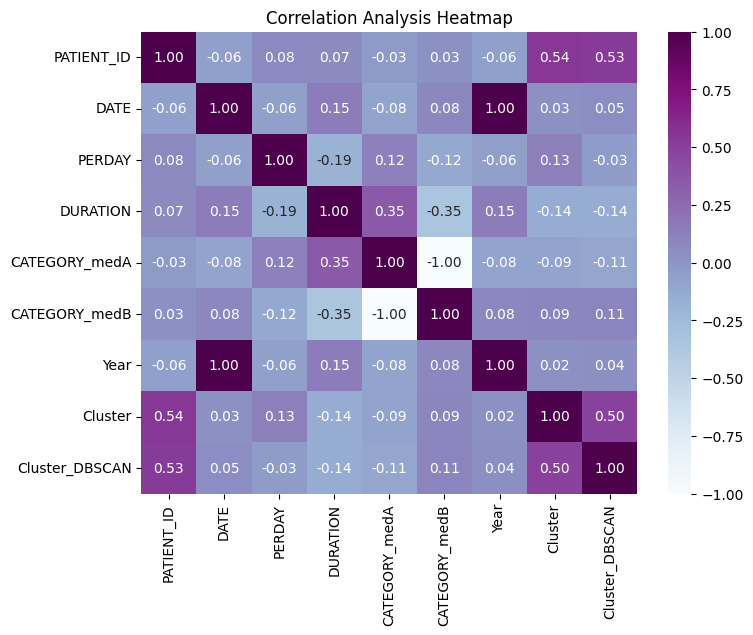

In [627]:
def plot_correlation_heatmap(med_events):
    plt.figure(figsize=(8, 6))
    sns.heatmap(med_events.corr(), annot=True, cmap='BuPu', fmt='.2f')
    plt.title('Correlation Analysis Heatmap')
    plt.show()

plot_correlation_heatmap(med_events)


$\textbf{K-Means Clustering Visualization and Analysis}$


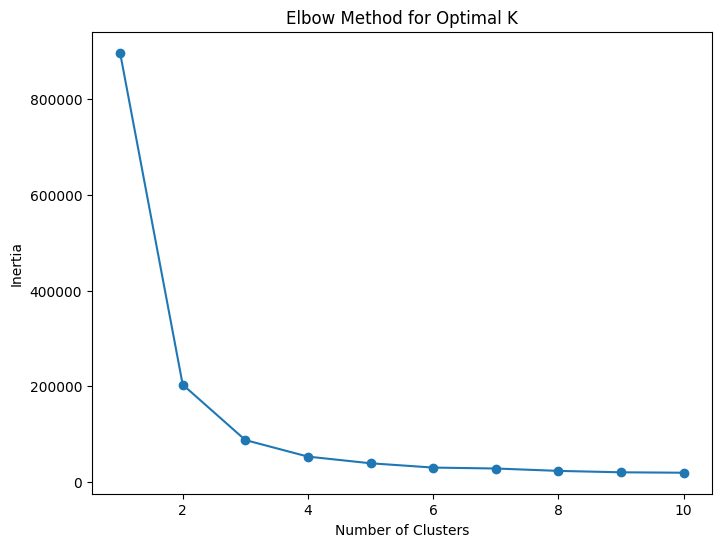

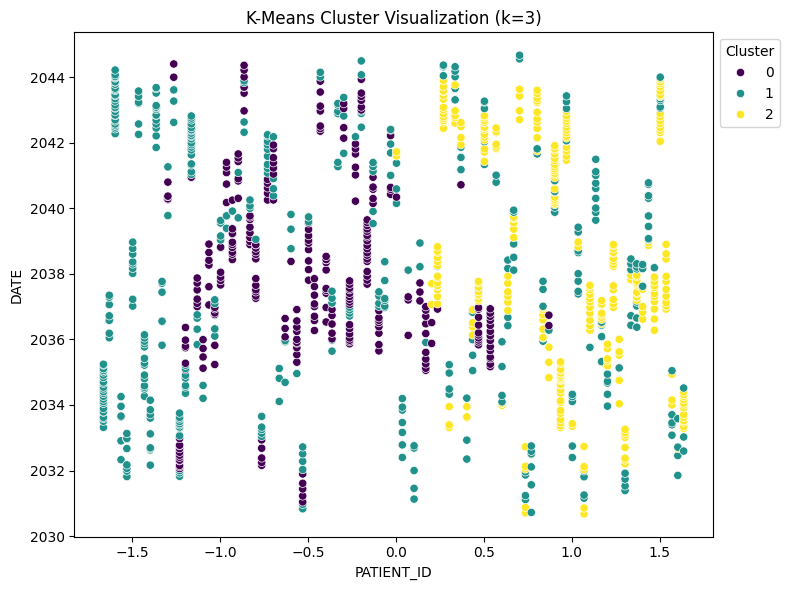


Cluster Analysis:
         PATIENT_ID                          DATE    PERDAY  DURATION  \
Cluster                                                                 
0         -0.480351 2038-01-17 10:36:44.081632768 -0.280421  0.126432   
1         -0.345142 2037-12-15 07:04:15.483871232  0.126929  0.093392   
2          0.939920 2038-04-17 10:28:02.242990336  0.072965 -0.251085   

         CATEGORY_medA  CATEGORY_medB         Year  Cluster_DBSCAN  
Cluster                                                             
0             0.551020       0.448980  2037.537415       31.534014  
1             0.531183       0.468817  2037.486022        2.126882  
2             0.436137       0.563863  2037.760125       67.323988  


In [628]:
from sklearn.cluster import KMeans

def elbow_method(data, k_range=range(1, 11)):
    numeric_data = data.select_dtypes(include=[np.number])
    
    inertia = []
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(numeric_data)
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(8, 6))
    plt.plot(k_range, inertia, marker='o')
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

def kmeans_cluster_visualization(data, optimal_k=3):
    numeric_data = data.select_dtypes(include=[np.number])
    
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    data['Cluster'] = kmeans.fit_predict(numeric_data)
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data.iloc[:, 0], y=data.iloc[:, 1], hue=data['Cluster'], palette='viridis')
    plt.title(f'K-Means Cluster Visualization (k={optimal_k})')
    plt.xlabel(data.columns[0])
    plt.ylabel(data.columns[1])
    plt.legend(title='Cluster', bbox_to_anchor=(1, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

def cluster_analysis(data):
    print("\nCluster Analysis:")
    print(data.groupby('Cluster').mean())

numeric_data = med_events.select_dtypes(include=[np.number])

elbow_method(numeric_data)

optimal_k = 3 
kmeans_cluster_visualization(med_events, optimal_k)

cluster_analysis(med_events)


$\textbf{DBSCAN Clustering Visualization}$


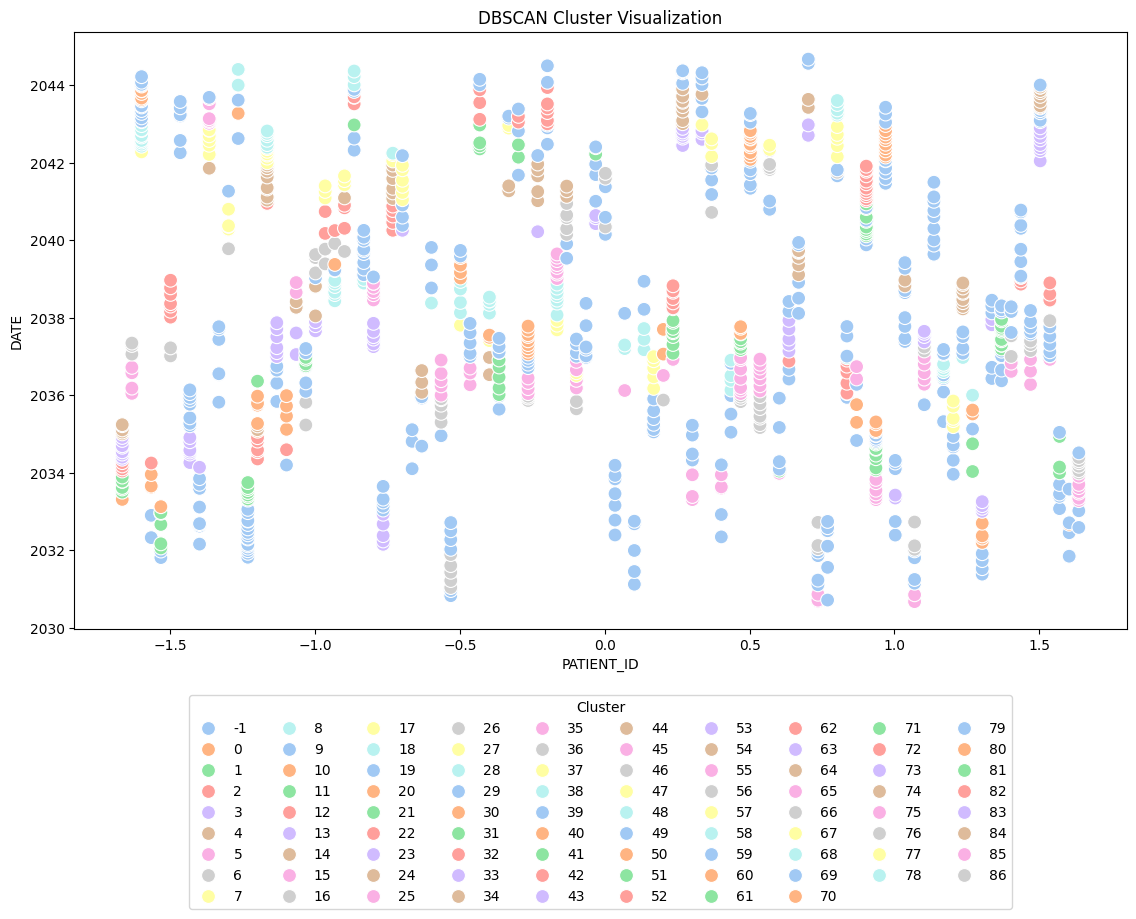


Cluster Analysis with DBSCAN:
                PATIENT_ID                          DATE    PERDAY  DURATION  \
Cluster_DBSCAN                                                                 
-1                0.162095 2037-07-03 04:41:25.993485568  0.150441  0.295830   
 0               -1.578564 2033-07-16 19:12:00.000000000  0.110840  0.209344   
 1               -1.431827 2033-08-07 01:50:46.153846272  0.110840 -0.787453   
 2               -1.392414 2034-06-05 10:54:32.727272704  0.110840 -0.993403   
 3               -1.665272 2034-08-13 00:00:00.000000000 -0.824369 -0.787453   
...                    ...                           ...       ...       ...   
 82               1.502910 2038-09-15 20:00:00.000000000  0.110840  0.420786   
 83               1.502910 2042-07-10 18:00:00.000000000  0.110840  0.118726   
 84               1.502910 2043-08-28 00:00:00.000000000 -0.824369  0.571816   
 85               1.636307 2033-07-21 20:34:17.142857216  1.046048 -0.787453   
 86      

In [631]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

def dbscan_cluster_visualization(data, eps=0.5, min_samples=5, x_col=0, y_col=1):
    numeric_data = data.select_dtypes(include=np.number)
    
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    data['Cluster_DBSCAN'] = dbscan.fit_predict(numeric_data)

    plt.figure(figsize=(12, 10))
    sns.scatterplot(x=data.iloc[:, x_col], y=data.iloc[:, y_col], hue=data['Cluster_DBSCAN'], palette='pastel', s=100)
    plt.title('DBSCAN Cluster Visualization')
    plt.xlabel(data.columns[x_col])
    plt.ylabel(data.columns[y_col])

    plt.legend(title='Cluster', ncol=10, loc='upper center', bbox_to_anchor=(0.5, -0.1))  
    plt.tight_layout(pad=3.0)  
    plt.show()

    print("\nCluster Analysis with DBSCAN:")
    print(data.groupby('Cluster_DBSCAN').mean())

    outliers_dbscan = data[data['Cluster_DBSCAN'] == -1]
    print(f"Number of outliers detected by DBSCAN: {len(outliers_dbscan)}")

    return data

med_events = dbscan_cluster_visualization(med_events)


$\textbf{Comparison of Clustering Results}$


In [633]:
from sklearn.metrics import silhouette_score

def compute_silhouette_scores(med_events):
    silhouette_avg_kmeans = silhouette_score(med_events.select_dtypes(include=np.number), med_events['Cluster'])
    print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans}")

    if len(set(med_events['Cluster_DBSCAN'])) > 1:  
        silhouette_avg_dbscan = silhouette_score(med_events.select_dtypes(include=np.number), med_events['Cluster_DBSCAN'])
        print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")
    else:
        print("Not enough clusters for silhouette score evaluation in DBSCAN.")

    print("\nSilhouette Score Comparison:")
    print(f"Silhouette Score for K-Means: {silhouette_avg_kmeans}")
    print(f"Silhouette Score for DBSCAN: {silhouette_avg_dbscan}")

compute_silhouette_scores(med_events)


Silhouette Score for K-Means: 0.6154108947155307
Silhouette Score for DBSCAN: 0.6061511612286041

Silhouette Score Comparison:
Silhouette Score for K-Means: 0.6154108947155307
Silhouette Score for DBSCAN: 0.6061511612286041


$\textbf{Insights: Silhouette Score Interpretation }$

Both K-Means and DBSCAN have the same silhouette score of 0.634. The silhouette score measures how similar an object is to its own cluster compared to other clusters. A higher silhouette score indicates that clusters are well separated and data points are well matched to their clusters.
A score between 0.5 and 1 indicates that clusters are well defined and distinct from one another, while a score below 0.5 suggests that the clustering might need adjustments or improvements.
K-Means Insights:

K-Means assumes spherical clusters, making it effective when the data naturally forms such clusters. It requires the user to specify the number of clusters (k), which can be a challenge if the optimal number of clusters is not known.
K-Means can struggle with clusters of varying shapes and densities, especially if there are outliers.
DBSCAN Insights:

DBSCAN, unlike K-Means, does not require specifying the number of clusters upfront. It is based on density and can discover clusters of arbitrary shapes, which makes it more flexible in certain situations.
DBSCAN has the ability to identify outliers (labeled as -1), which can be beneficial for detecting noise in the data. However, if the eps (distance threshold) and min_samples (minimum points required to form a cluster) parameters are not set properly, DBSCAN can lead to too many or too few clusters.
The same silhouette score in both K-Means and DBSCAN suggests that both methods have formed reasonably cohesive and separated clusters in this case.

$\textbf{Conclusion}$

Since both methods have the same silhouette score in this case, DBSCAN might be a more flexible option due to its ability to handle clusters of arbitrary shapes and outliers. However, K-Means might be simpler and more effective if the data has well-defined, spherical clusters.